In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [2]:
df = dataset = pd.read_csv("kc_house_data.csv")
dataset.head(10)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503
5,1230000.0,4,4.50,5420,101930,1.0,3,11,3890,1530,2001,0,47.6561,-122.005,4760,101930
6,257500.0,3,2.25,1715,6819,2.0,3,7,1715,0,1995,0,47.3097,-122.327,2238,6819
7,291850.0,3,1.50,1060,9711,1.0,3,7,1060,0,1963,0,47.4095,-122.315,1650,9711
8,229500.0,3,1.00,1780,7470,1.0,3,7,1050,730,1960,0,47.5123,-122.337,1780,8113
9,323000.0,3,2.50,1890,6560,2.0,3,7,1890,0,2003,0,47.3684,-122.031,2390,7570


In [3]:
X = dataset.iloc[0:,1:16] #iloc stands for integer-location based indexing. iloc[RowStart;, ColumnStart:ColumnEnd]
y = dataset.iloc[0:,0]

X = X.drop(['lat', 'long'], axis=1)
print(X)
print(y)

       bedrooms  bathrooms  sqft_living  sqft_lot  floors  condition  grade  \
0             3       1.00         1180      5650     1.0          3      7   
1             3       2.25         2570      7242     2.0          3      7   
2             2       1.00          770     10000     1.0          3      6   
3             4       3.00         1960      5000     1.0          5      7   
4             3       2.00         1680      8080     1.0          3      8   
...         ...        ...          ...       ...     ...        ...    ...   
21608         3       2.50         1530      1131     3.0          3      8   
21609         4       2.50         2310      5813     2.0          3      8   
21610         2       0.75         1020      1350     2.0          3      7   
21611         3       2.50         1600      2388     2.0          3      8   
21612         2       0.75         1020      1076     2.0          3      7   

       sqft_above  sqft_basement  yr_built  yr_reno

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10,random_state=1)
# We can use "train_test_split" to create the four variables for training (X_train and y_train) and testing (X_test and y_test). 
# This is the recommended approach, particularly for large datasets, as opposed to manual separation used last week.

In [5]:
regressor = DecisionTreeRegressor(max_depth = 9) 
#https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html for different parameters
#max_depth
#max_features
#max_leaf_nodes

In [6]:
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test) # Creating a variable which holds all the predicted values from our test data.


print(y_test)
print(y_pred)

15544     459000.0
17454     445000.0
21548    1060000.0
3427      732350.0
8809      235000.0
           ...    
12561    1090000.0
7167      445000.0
3075      650000.0
10876     238950.0
6654      358000.0
Name: price, Length: 2162, dtype: float64
[ 637253.63478261  330598.04329897 1232500.         ...  552164.08
  340589.47265625  430277.45679012]


In [7]:
#The output above shows firstly the actual price value (y_test). the 2nd is the price value (y_pred). 
# The first row in y_test is 459000 vs the first row in y_pred which is [637253.63478261]. 
#Value will change everytime it's run due to test_size and random_state.

In [8]:
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)
r_s = metrics.r2_score(y_test, predictions)
print("Linger Regession moder r2 = ", r_s)

Linger Regession moder r2 =  0.6795039738011405


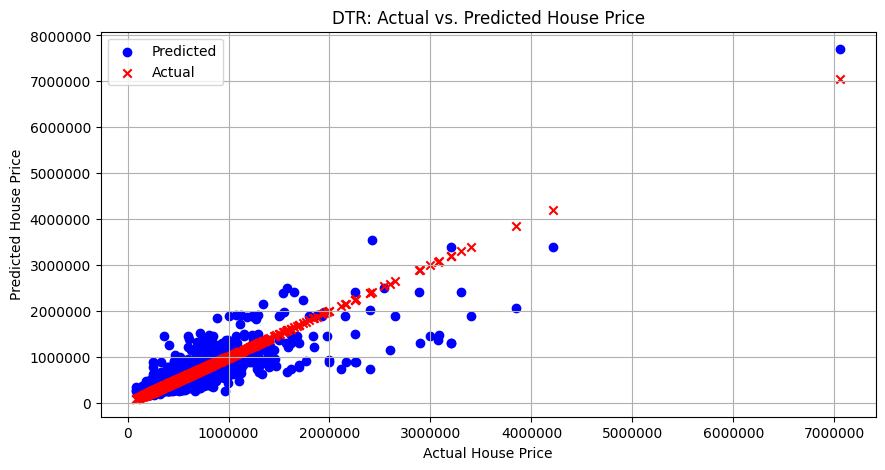

In [9]:
plt.figure(figsize=(10,5))
plt.ticklabel_format(style='plain')
plt.scatter(y_test, y_pred, color='blue', label='Predicted')
plt.scatter(y_test, y_test, color='red', label='Actual', marker='x')
plt.xlabel('Actual House Price')
plt.ylabel('Predicted House Price')
plt.title('DTR: Actual vs. Predicted House Price')
plt.legend()

plt.grid(True)
plt.show()